## Dataset Link
[Arxiv Dataset download link](https://drive.google.com/file/d/1-EhpZaY5gvbgNuEU5IskmlQ0EnNAG5cu/view?usp=drive_link).

## Install Pypark & Initialization

In [1]:
!pip install pyspark
!pip install pyspark findspark

In [2]:
import pyspark
import findspark
from pyspark.sql import SparkSession
findspark.init()
spark = SparkSession\
        .builder\
        .appName("MDA2024-HW1")\
        .master("local[*]")\
        .getOrCreate()
sc=spark.sparkContext
sc

<SparkContext master=local[*] appName=MDA2024-HW1>

## Section 1: Reading the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this section, you should get familiar with the dataset structure and extract useful information from each column.

### part 1: parse the json string

In [4]:
arxiv_rdd = sc.textFile("drive/MyDrive/content/MDA2024-Arxiv-Dataset.json")

In [5]:
arxiv_rdd.take(1)

['{"id":"0704.0001","submitter":"Pavel Nadolsky","authors":"C. Bal\\\\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan","title":"Calculation of prompt diphoton production cross sections at Tevatron and\\n  LHC energies","comments":"37 pages, 15 figures; published version","journal-ref":"Phys.Rev.D76:013009,2007","doi":"10.1103/PhysRevD.76.013009","report-no":"ANL-HEP-PR-07-12","categories":"hep-ph","license":null,"abstract":"  A fully differential calculation in perturbative quantum chromodynamics is\\npresented for the production of massive photon pairs at hadron colliders. All\\nnext-to-leading order perturbative contributions from quark-antiquark,\\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\\nall-orders resummation of initial-state gluon radiation valid at\\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\\nspecified in which the calculation is most reliable. Good agreement is\\ndemonstrated with data from the Fermilab Tevatro

In [6]:
# TODO: find the answers of the above questions.
import json

In [7]:
parsed_rdd = arxiv_rdd.map(lambda line: json.loads(line))
parsed_rdd.take(1)

[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': None,
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with d

### part 2: create a function that extracts and lists all fields (e.g., title, abstract, etc.) from the parsed RDD.

In [8]:
def FieldExtractor(paper): # Also handles None values
  return {
      'id': paper.get('id') if paper.get('id') is not None else 'N/A',
      'submitter' : paper.get('submitter') if paper.get('submitter') is not None else 'N/A',
      'authors' : paper.get('authors') if paper.get('authors') is not None else 'N/A',
      'title' : paper.get('title') if paper.get('title') is not None else 'N/A',
      'comments' : paper.get('comments') if paper.get('comments') is not None else 'N/A',
      'journal-ref' : paper.get('journal-ref') if paper.get('journal-ref') is not None else 'N/A',
      'doi' : paper.get('doi') if paper.get('doi') is not None else 'N/A',
      'report-no' : paper.get('report-no') if paper.get('report-no') is not None else 'N/A',
      'categories' : paper.get('categories'),
      'license' : paper.get('license') if paper.get('license') is not None else 'N/A',
      'abstract' : paper.get('abstract') if paper.get('abstract') is not None else 'N/A',
      'versions' : paper.get('versions') if paper.get('versions') is not None else 'N/A',
      'update_date' : paper.get('update_date') if paper.get('update_date') is not None else 'N/A',
      'authors_parsed' : paper.get('authors_parsed') if paper.get('authors_parsed') is not None else 'N/A'
  }
# Extract and Convert to a list --> Assuming all keys are the same,
# otherwise we can perform reduction
keys = list(parsed_rdd.first().keys())
# Print the common keys
print("Fieleds: \n", keys)
# Employing function
fields_rdd = parsed_rdd.map(FieldExtractor)
fields_rdd.take(5)

Fieleds: 
 ['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license', 'abstract', 'versions', 'update_date', 'authors_parsed']


[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': 'N/A',
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with 

## Section 2: Preprocessing

In this section, we will clean the dataset by removing stop words and irrelevant characters to ensure the data is well-prepared for analysis.

### part 1: Identify and remove or impute any null values, especially in critical fields


- Already taken care of in previous section-part2: <br>(**FieldExtractor Function**)

### part 2: find and remove stopwords

In [12]:
import re
from pyspark.ml.feature import StopWordsRemover
stopwords = set(StopWordsRemover.loadDefaultStopWords("english"))
def process_stopwords(item):
    for stopword in stopwords:
      # ! only abstract and title fields have stopwords
      item['title'] = re.sub(fr' {stopword}$', ' ', item['title'], flags=re.IGNORECASE)
      item['title'] = re.sub(f' {stopword} ', ' ', item['title'], flags=re.IGNORECASE)
      item['abstract'] = re.sub(f' {stopword} ', ' ', item['abstract'], flags=re.IGNORECASE)
      item['abstract'] = re.sub(fr' {stopword}$', ' ', item['abstract'], flags=re.IGNORECASE)
      item['authors'] = re.sub(f' {stopword} ', ',', item['authors'], flags=re.IGNORECASE)
    return item

fields_NoStopWords_rdd = fields_rdd.map(process_stopwords)
fields_NoStopWords_rdd.take(10)

[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation prompt diphoton production cross sections Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': 'N/A',
  'abstract': '  fully differential calculation perturbative quantum chromodynamics is\npresented production massive photon pairs hadron colliders. All\nnext-to-leading order perturbative contributions quark-antiquark,\ngluon-(anti)quark, gluon-gluon subprocesses included, well as\nall-orders resummation initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. region phase space is\nspecified calculation reliable. Good agreement is\ndemonstrated data Fermilab Tevatron, predictions made for\nmore detailed tests CDF data. P

### part 3: find and remove useless characters

In [13]:
from itertools import chain
def cleaner(page):
    replacements = {i: ' ' for i in chain(range(33, 64), range(123, 128), range(0, 32), range(91, 97))}
    replacements.update({ord('\n'): ' ',  ord('\u200c'): ' ', ord('\u200e'): ' ',
        ord('\u200d'): ' ', ord('–'): ' ', ord('_'): ' ', ord('،'): ' ', ord('.'): ' ',
        ord('•'): ' ',
    })
    page['title'] = re.sub(' {2,}', ' ', page['title'].translate(replacements)).strip()
    page['abstract'] = re.sub(' {2,}', ' ', page['abstract'].translate(replacements)).strip()
    return page
clean_rdd0 = fields_NoStopWords_rdd.map(cleaner)
print(clean_rdd0.take(4))
print(fields_NoStopWords_rdd.take(4))

[{'id': '0704.0001', 'submitter': 'Pavel Nadolsky', 'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan", 'title': 'Calculation prompt diphoton production cross sections Tevatron and LHC energies', 'comments': '37 pages, 15 figures; published version', 'journal-ref': 'Phys.Rev.D76:013009,2007', 'doi': '10.1103/PhysRevD.76.013009', 'report-no': 'ANL-HEP-PR-07-12', 'categories': 'hep-ph', 'license': 'N/A', 'abstract': 'fully differential calculation perturbative quantum chromodynamics is presented production massive photon pairs hadron colliders All next to leading order perturbative contributions quark antiquark gluon anti quark gluon gluon subprocesses included well as all orders resummation initial state gluon radiation valid at next to next to leading logarithmic accuracy region phase space is specified calculation reliable Good agreement is demonstrated data Fermilab Tevatron predictions made for more detailed tests CDF data Predictions shown for distributions diphoto

### Part 4: Even more purity!
Since after removing extra charachters, stopwords apear again,we need to remove the new stopwords

In [14]:
stopwords = set(StopWordsRemover.loadDefaultStopWords("english"))
def process_stopwords(item):
    for stopword in stopwords:
      # ! only abstract and title fields have stopwords
      item['title'] = re.sub(fr' {stopword}$', ' ', item['title'], flags=re.IGNORECASE)
      item['title'] = re.sub(f' {stopword} ', ' ', item['title'], flags=re.IGNORECASE)
      item['abstract'] = re.sub(f' {stopword} ', ' ', item['abstract'], flags=re.IGNORECASE)
      item['abstract'] = re.sub(fr' {stopword}$', ' ', item['abstract'], flags=re.IGNORECASE)
    return item

clean_rdd = clean_rdd0.map(process_stopwords)
clean_rdd.take(10)

[{'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation prompt diphoton production cross sections Tevatron LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': 'N/A',
  'abstract': 'fully differential calculation perturbative quantum chromodynamics presented production massive photon pairs hadron colliders next leading order perturbative contributions quark antiquark gluon anti quark gluon gluon subprocesses included well orders resummation initial state gluon radiation valid next next leading logarithmic accuracy region phase space specified calculation reliable Good agreement demonstrated data Fermilab Tevatron predictions made detailed tests CDF data Predictions shown distributions diphoton pairs produced energy Large

## Section 3: Dataset Analysis

### part 1: How many articles exist in each category (e.g., hep-ph, math.co)?

In [ ]:
category_counts = (
    fields_rdd.map(lambda record: (record['categories'], 1))  # Create (category, 1) pairs
       .reduceByKey(lambda a, b: a + b)               # Aggregate counts
)
# print(category_counts.collect())

[('physics.optics physics.class-ph quant-ph', 12), ('hep-th quant-ph', 982), ('hep-th astro-ph gr-qc hep-ph', 702), ('cs.LG cs.SC', 17), ('cond-mat.dis-nn cond-mat.stat-mech cs.CC', 23), ('cs.GT cs.MA', 212), ('physics.bio-ph physics.optics', 92), ('physics.optics nlin.PS', 706), ('math.OA math.GN', 11), ('astro-ph nucl-ex nucl-th', 23), ('nucl-ex hep-ph', 127), ('cond-mat.supr-con astro-ph cond-mat.str-el hep-th', 2), ('math.KT math.DS', 6), ('math.PR math.FA', 613), ('math.NT math.AC', 119), ('math.AC math.GM math.NT math.RA', 1), ('math-ph cond-mat.str-el math.MP', 57), ('physics.acc-ph physics.optics', 145), ('math.DG gr-qc math.MG math.OC physics.class-ph', 1), ('cs.LO cs.CC', 237), ('cond-mat.dis-nn nlin.CD', 55), ('physics.soc-ph physics.bio-ph', 49), ('astro-ph gr-qc hep-lat hep-ph hep-th physics.atom-ph', 1), ('q-fin.PR cond-mat.stat-mech math-ph math.MP physics.data-an physics.soc-ph', 1), ('hep-th cond-mat.stat-mech hep-lat nlin.PS', 1), ('math.QA hep-th math.RA math.RT nlin

### part 2: Which category has the most articles?

In [ ]:
category_counts.map(lambda a: (a[1], a[0])).sortByKey().top(10)

[(86911, 'astro-ph'),
 (81999, 'hep-ph'),
 (71007, 'quant-ph'),
 (63257, 'cs.CV'),
 (59401, 'hep-th'),
 (40266, 'cond-mat.mtrl-sci'),
 (35492, 'cond-mat.mes-hall'),
 (35333, 'math.AP'),
 (31712, 'astro-ph.GA'),
 (31068, 'gr-qc')]

### part 3(**Bonus**): What is the distribution of the number of authors per article? (e.g., what percentage of articles have 1 author, more than 3 authors?)

In [ ]:
# author_distribution = fields_NoStopWords_rdd.map(lambda x: len(x['authors'].split(','))).countByValue()

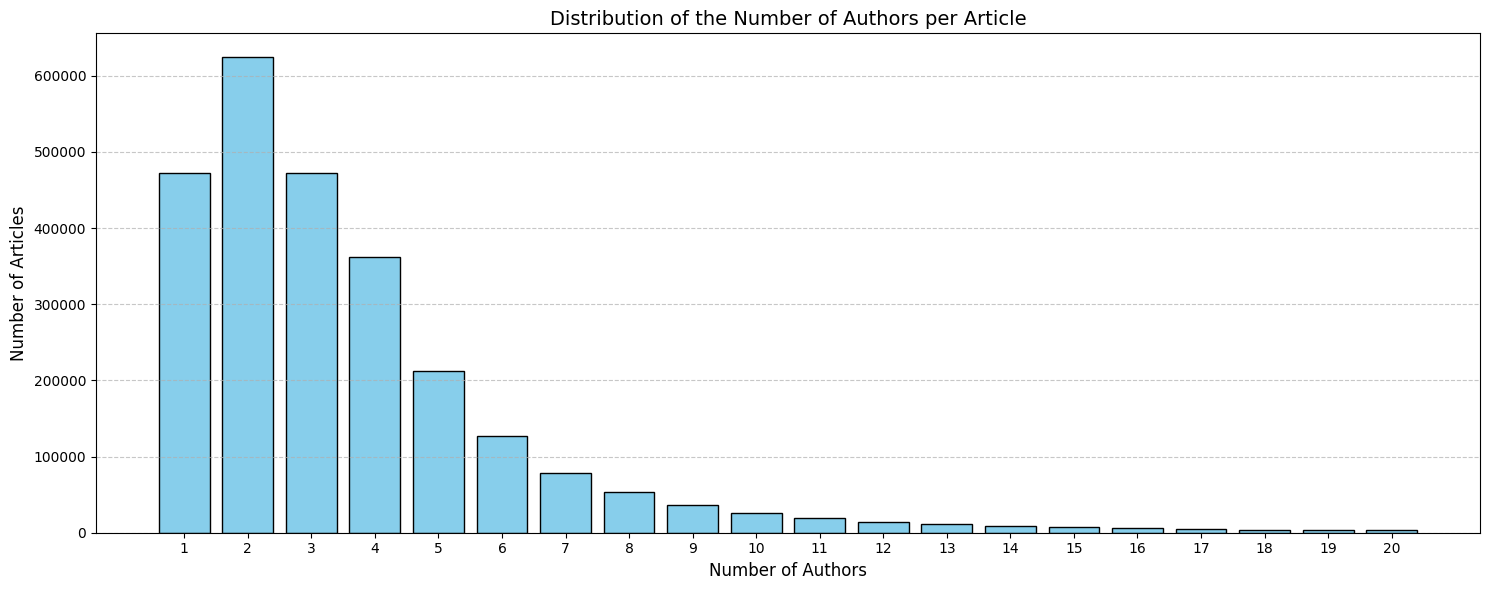

In [ ]:
import matplotlib.pyplot as plt
sorted_data = sorted(author_distribution.items(), key=lambda x: -x[1])[:20]
num_authors, counts = zip(*sorted_data)

# Plot the data
plt.figure(figsize=(15, 6))
plt.bar(num_authors, counts, color='skyblue', edgecolor='black')
plt.title("Distribution of the Number of Authors per Article", fontsize=14)
plt.xlabel("Number of Authors", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(num_authors, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### part 4 (**Bonus**): Filter out the articles that have more than 3 authors and generate a list of their titles and authors. Display the first 10 results.

In [ ]:
filtered_rdd = clean_rdd.filter(lambda paper: len(paper['authors'].split(',')) > 3)

titles_and_authors_rdd = filtered_rdd.map(lambda paper: (paper['title'], paper['authors']))

first_10_results = titles_and_authors_rdd.take(10)

for idx, (title, authors) in enumerate(first_10_results, start=1):
    print(f"{idx}. Title: {title}, Authors: {authors}")


1. Title: Calculation prompt diphoton production cross sections Tevatron LHC energies, Authors: C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan
2. Title: The Spitzer c d Survey Large Nearby Insterstellar Clouds IX Serpens YSO Population Observed IRAC MIPS, Authors: Paul Harvey, Bruno Merin, Tracy L. Huard, Luisa M. Rebull, Nicholas
  Chapman, Neal J. Evans II, Philip C. Myers
3. Title: Lifetime doubly charmed baryons, Authors: Chao-Hsi Chang, Tong Li, Xue-Qian Li,Yu-Ming Wang
4. Title: Spectroscopic Observations Intermediate Polar EX Hydrae Quiescence, Authors: Nceba Mhlahlo, David H. Buckley, Vikram S. Dhillon, Steven B. Potter,
  Brian Warner,Patric A. Woudt
5. Title: Formation quasi solitons transverse confined ferromagnetic film media, Authors: A.A. Serga, M. Kostylev,,B. Hillebrands
6. Title: Spectroscopic Properties Polarons Strongly Correlated Systems Exact Diagrammatic Monte Carlo Method, Authors: A. S. Mishchenko (1,2),N. Nagaosa (1,3) ((1) CREST, Japan
  Science,Technol

### part 5: Plot a time series of the number of articles submitted per year.

In [ ]:
# Extract year from update_date
yearly_counts = fields_rdd.map(lambda x: (x['update_date'][:4], 1)) \
                          .filter(lambda x: x[0] is not None) \
                          .reduceByKey(lambda a, b: a + b) \
                          .collect()

# Sort the data by year
yearly_counts = sorted(yearly_counts, key=lambda x: x[0])
years, counts = zip(*yearly_counts)

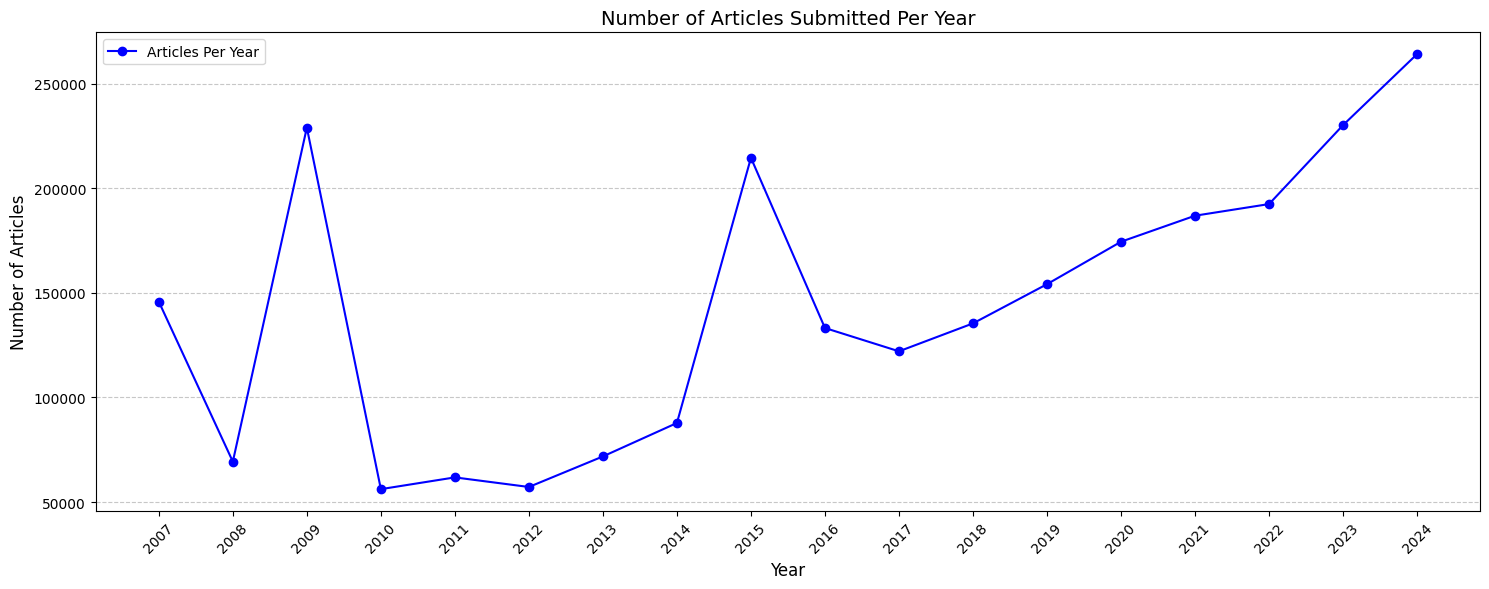

In [ ]:
# plot
plt.figure(figsize=(15, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='b', label="Articles Per Year")
plt.title("Number of Articles Submitted Per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

### part 6: What are the 20 most frequent words in abstract?

In [ ]:
def process(record):
    words = record['abstract'].lower().split()
    cleaned_words = [re.sub(r"[^a-zA-Z0-9]", "", word) for word in words]
    return [word for word in cleaned_words if word and word not in stopwords]

abstract_words = parsed_rdd.flatMap(process)

word_counts = abstract_words.map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)

most_frequent_words = word_counts.takeOrdered(20, key=lambda x: -x[1])

print("20 most frequent words in abstract:")
for word, count in most_frequent_words:
    print(word, ":", count)


20 most frequent words in abstract:
model : 1188676
data : 917131
results : 859049
show : 831879
using : 809828
also : 774216
two : 719284
models : 686537
paper : 650231
study : 596891
method : 596084
quantum : 573410
system : 559067
new : 550050
field : 544587
based : 527532
one : 518005
time : 506071
different : 497350
present : 477899


### part 7: Visualize the frequently occurring words identified in the previous part by generating a Word Cloud.

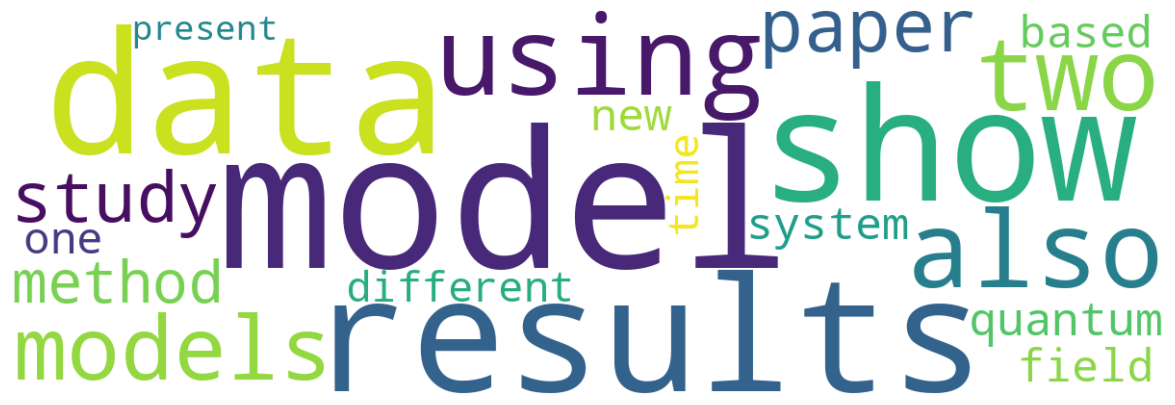

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq_dict = dict(most_frequent_words)

wordcloud = WordCloud(width=1200, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Section 4: Advanced Data Exploration

- part 1: First, find articles that contain the word "algorithm" in their abstract.
- part 2: for these articles, count the number of words in each article's abstract.
- part 3: sort the articles by the word count in the abstract in descending order and display the top five articles with the highest word counts in their abstract.

### part1: Find articles that contain the word "algorithm" in their abstract.

In [42]:
algorithm_rdd = parsed_rdd.filter(lambda x: 'algorithm' in x['abstract'].re.IGNORECASE())

### part 2:For these articles, count the number of words in each article's abstract.

In [35]:
count_algorithm_rdd = algorithm_rdd.map(lambda x: (x['title'], len(x['abstract'].split())))

### part 3: sort the articles by the word count in the abstract in descending order and display the top five articles with the highest word counts in their abstract.

In [ ]:
top_count_algorithm_rdd = count_algorithm_rdd

print("Top 5 articles with the highest word counts in their abstract (containing 'algorithm'):")
for title, word_count in top_count_algorithm_rdd:
    print(f"Title: {title}, Word Count: {word_count}")

Top 5 articles with the highest word counts in their abstract (containing 'algorithm'):
Title: The Nonlinearity Coefficient - A Practical Guide to Neural Architecture
  Design, Word Count: 498
Title: Generating a Generic Fluent API in Java, Word Count: 488
Title: Boxicity and Poset Dimension, Word Count: 484
Title: An Anytime Algorithm for Optimal Coalition Structure Generation, Word Count: 484
Title: McMini: A Programmable DPOR-Based Model Checker for Multithreaded
  Programs, Word Count: 475
